In [13]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Homodimerization

$$ \emptyset \xrightarrow{k_1} mX_1 $$
$$ X_1 \xrightarrow{k_2} \emptyset$$

with parameter $k_1 = 5, k_2 = 0.5$.

In [14]:
def rate1(X):
    return 1

def rate2(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0
    
# Model Parameters
drift = [rate1, rate2]
S_matrix = np.array([[1], [-1]])  # Stoichiometry matrix
c = np.array([6, 0.5])  # Reaction rates
X0 = np.array([100])  # Initial state
T = 2  # Total time


## SSA

In [15]:
n_runs = 5000
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)


0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed


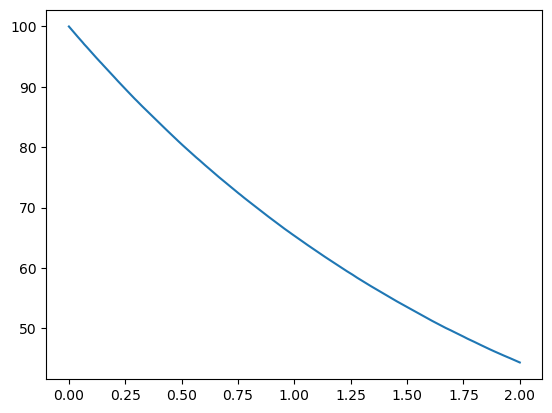

In [16]:
plt.plot(t_ssa, x_ssa)

## Tau-leaping

In [17]:
tau = 0.2  # Leap size

n_runs = 1000
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed
Number of steps:  11


In [18]:
std_tau = np.std(runs, axis=0)[:,0]

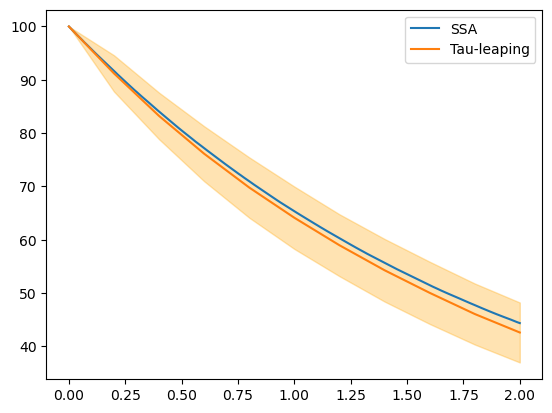

In [19]:
x_tau = np.mean(runs, axis=0)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='orange')
plt.legend()

## Mean-field

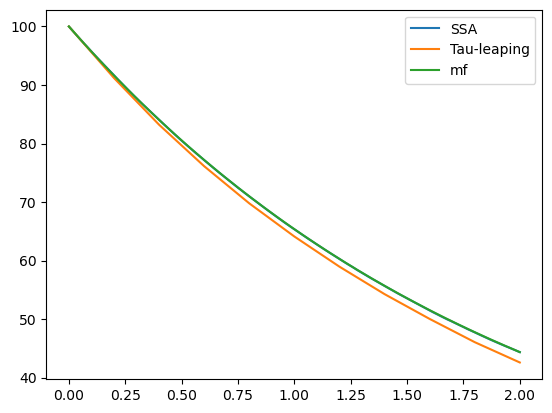

In [20]:

tmf = np.linspace(0,T, 5000)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mf')
plt.legend()


## SOGA 

In [21]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/Homodimerization_linear.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.

In [22]:
t = len(t_tau)

x1 = np.zeros(t)
std1 = np.zeros(t)

for i in range(t):
    idx1 = output_dist.var_list.index('X0[{}]'.format(i))
    x1[i] = output_dist.gm.mean()[idx1]
    std1[i] = np.sqrt(output_dist.gm.cov()[idx1,idx1])

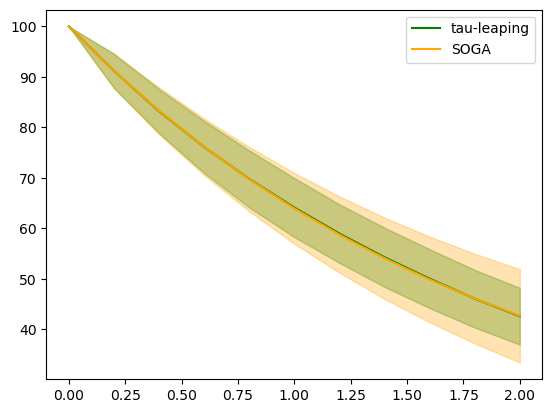

In [23]:
plt.plot(t_tau, x_tau[:,0], label='tau-leaping', color='green')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

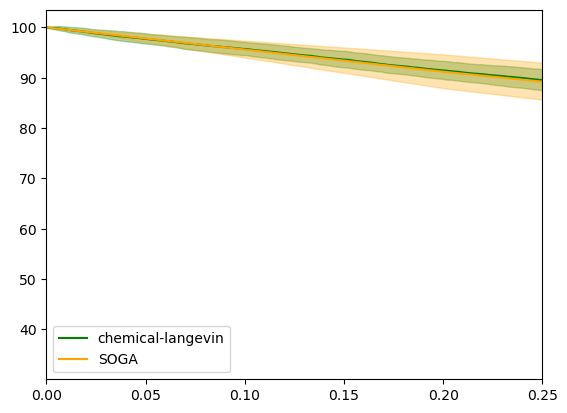

In [25]:
tcl = np.linspace(0,T, 10)
Xcl = []
for i in range(100):
    Xcl.append(euler_maruyama(drift,S_matrix,c,X0,tmf))

Xcl_mean = np.mean(np.array(Xcl), axis=0)
std_xcl = np.std(np.array(Xcl), axis=0)

# Plot
plt.plot(tmf, Xcl_mean[:,0], label='chemical-langevin', color='green')
plt.fill_between(tmf, Xcl_mean[:,0]-std_xcl[:,0], Xcl_mean[:,0]+std_xcl[:,0] ,alpha=0.3, color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

plt.show()
